In [1]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
import os
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

In [3]:
# Carico il dataset con le feature standardizzate

standardized_features = pd.read_csv("/Volumes/Mac/DatasetSP/feature engineering/feature_selected/standardized_features_train.csv")

In [4]:
metadata = standardized_features[['Subject', 'Test', 'Trial', 'Bout', 'Position']]
standardized_features = standardized_features.drop(columns=["Subject", "Test", "Trial", "Bout", "Position"])

In [5]:
pca = PCA()
pca.fit(standardized_features)

PCA()

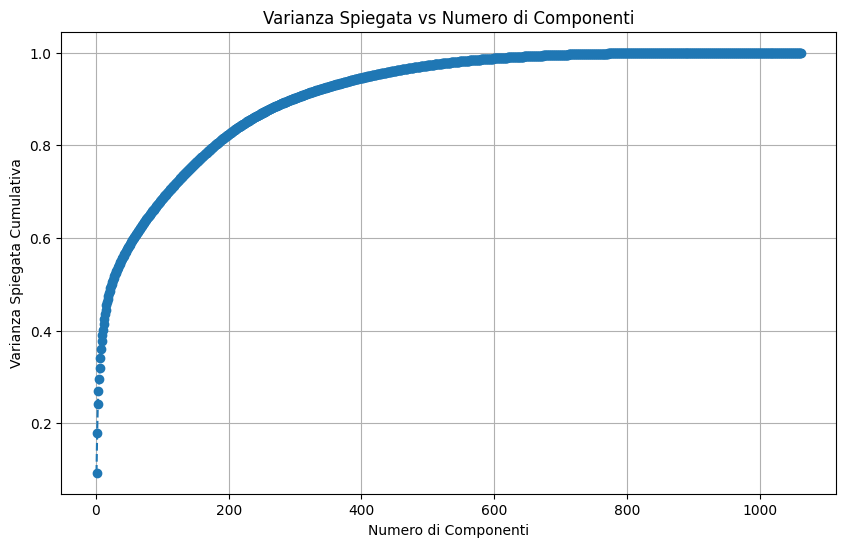

Numero di componenti scelto: 413


In [6]:
# Calcola la varianza spiegata cumulativa
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Visualizza la varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid()
plt.show()

# Seleziona il numero di componenti per spiegare il 95% della varianza
n_components = next(i for i, v in enumerate(explained_variance_ratio) if v >= 0.95) + 1
print(f"Numero di componenti scelto: {n_components}")


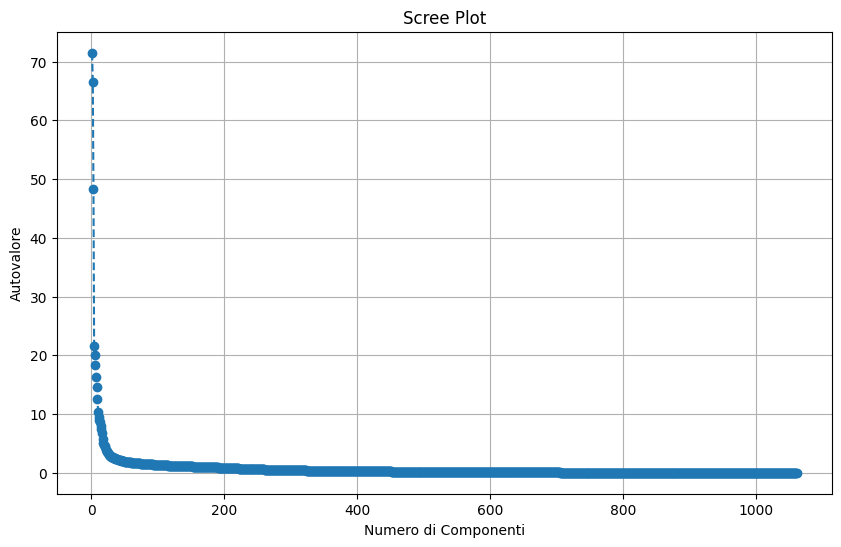

In [7]:
# Autovalori delle componenti principali
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Autovalore')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [9]:
# selezione le componenti principali che spiegano il 95% della varianza

# Trasforma il dataset usando il numero selezionato di componenti principali
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_features)

# Crea il nuovo dataset con le PC e il target
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

# Aggiungi il target (Position) al dataset delle PC
pca_df['Position'] = metadata['Position']
pca_df['Subject'] = metadata['Subject']

# Salva il dataset pronto per il training
output_path = "/Volumes/Mac/DatasetSP/feature engineering/feature_selected/dataset_with_pcs_train.csv"
pca_df.to_csv(output_path, index=False)
print(f"Dataset pronto per il training salvato in: {output_path}")

Dataset pronto per il training salvato in: /Volumes/Mac/DatasetSP/feature engineering/feature_selected/dataset_with_pcs_train.csv
